<a href="https://colab.research.google.com/github/Gajalakshmi993/Harvard_Project/blob/main/Diamond2_preprocess_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = r"/content/drive/MyDrive/Diamond_cleaned.csv"
df = pd.read_csv(file_path)
df.head()

,carat,cut,color,clarity,Total_depth_Percentage,table,price,Length,Width,Depth
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75


In [30]:
import numpy as np
import pandas as pd

##Skewness handling

In [31]:
skew_values = df[['price', 'carat', 'Length', 'Width', 'Depth']].skew()

print(skew_values)

price     1.618395
carat     0.899893
Length    0.394179
Width     0.389861
Depth     0.387198
dtype: float64


In [32]:
import numpy as np
df['price'] = np.log1p(df['price'])#log transformation
df['carat'] = np.sqrt(df['carat'])# sqrt transformation

In [33]:
print("\nAfter log transformation skewness:")
print(df[['price', 'carat']].skew())


After log transformation skewness:
price    0.115926
carat    0.454935
dtype: float64


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

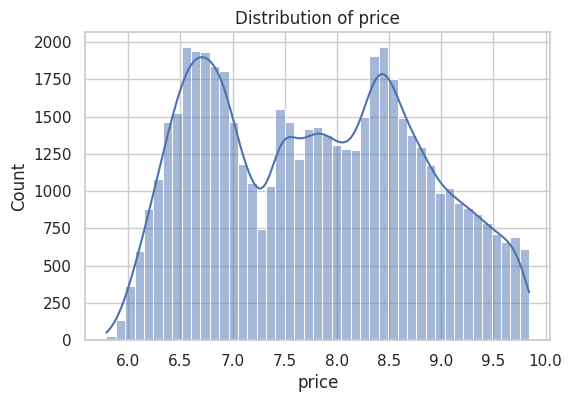

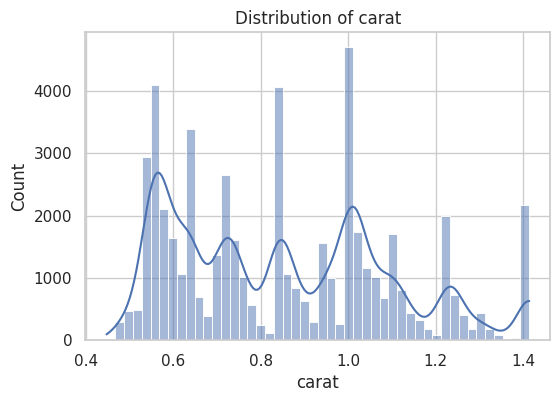

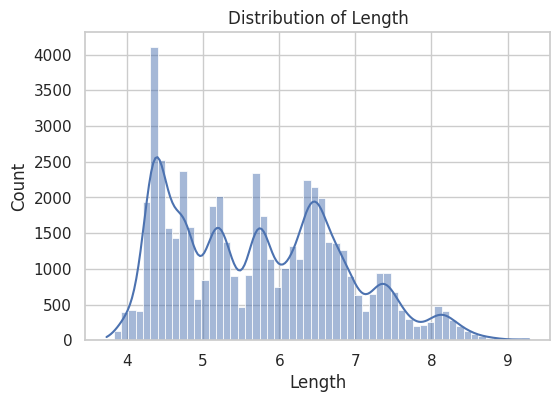

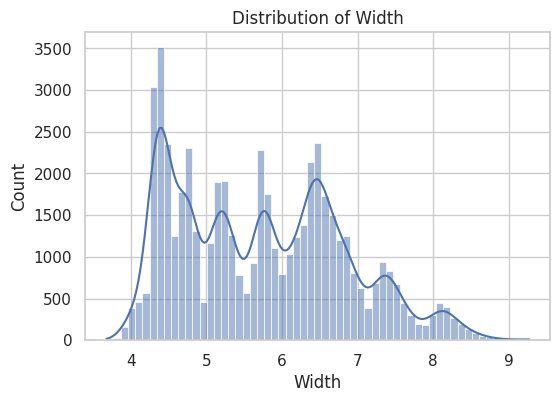

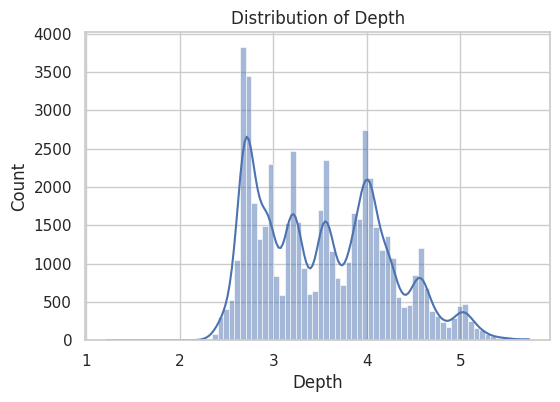

In [35]:
num_features = ['price', 'carat', 'Length', 'Width', 'Depth']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


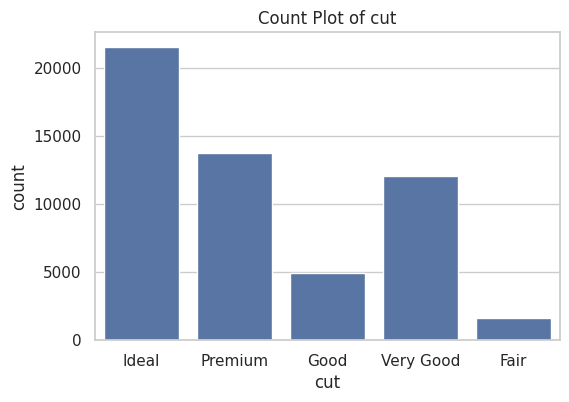

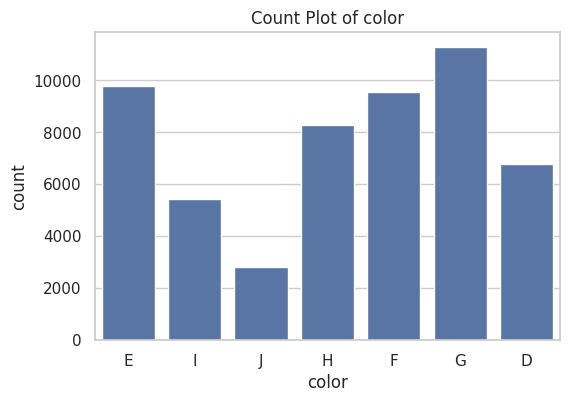

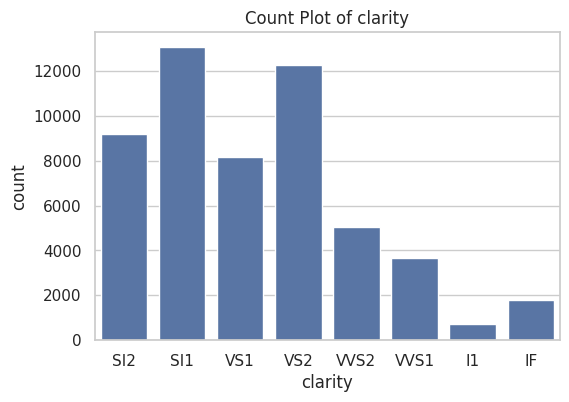

In [36]:
cat_features = ['cut', 'color', 'clarity']

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()


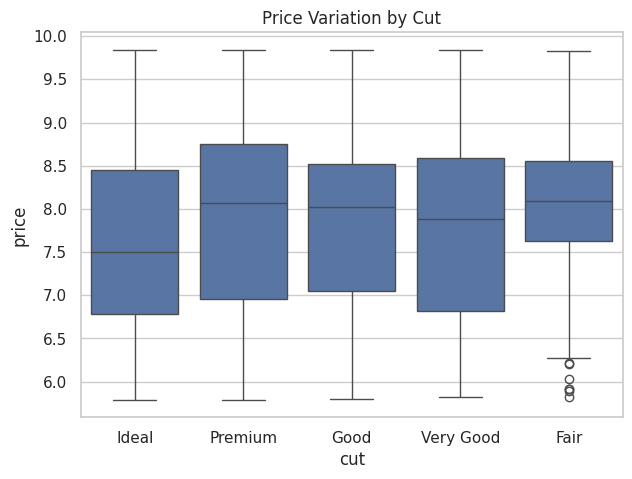

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(x="cut", y="price", data=df)
plt.title("Price Variation by Cut")
plt.show()


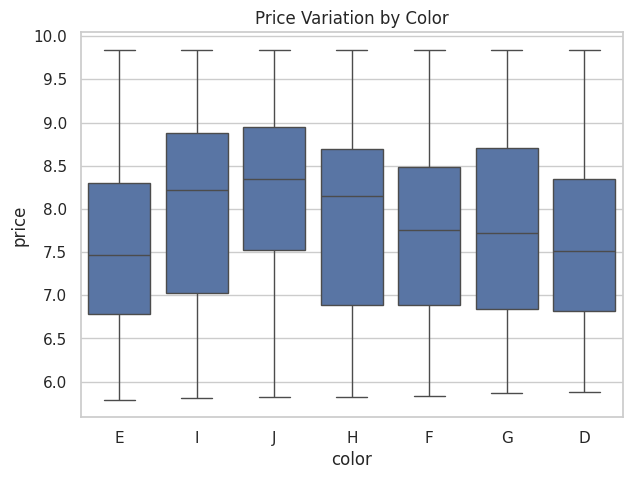

In [38]:
plt.figure(figsize=(7,5))
sns.boxplot(x="color", y="price", data=df)
plt.title("Price Variation by Color")
plt.show()


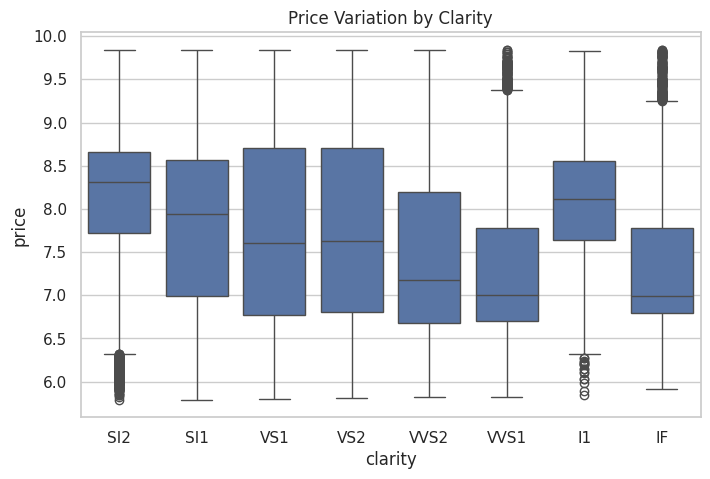

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x="clarity", y="price", data=df)
plt.title("Price Variation by Clarity")
plt.show()


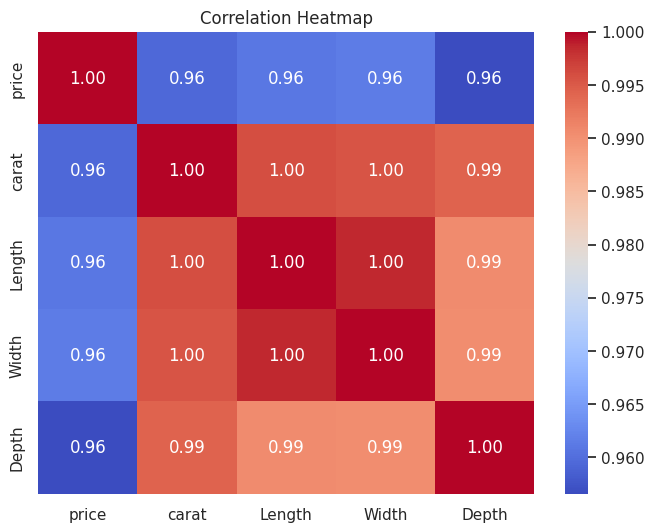

In [40]:
plt.figure(figsize=(8,6))
corr = df[num_features].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


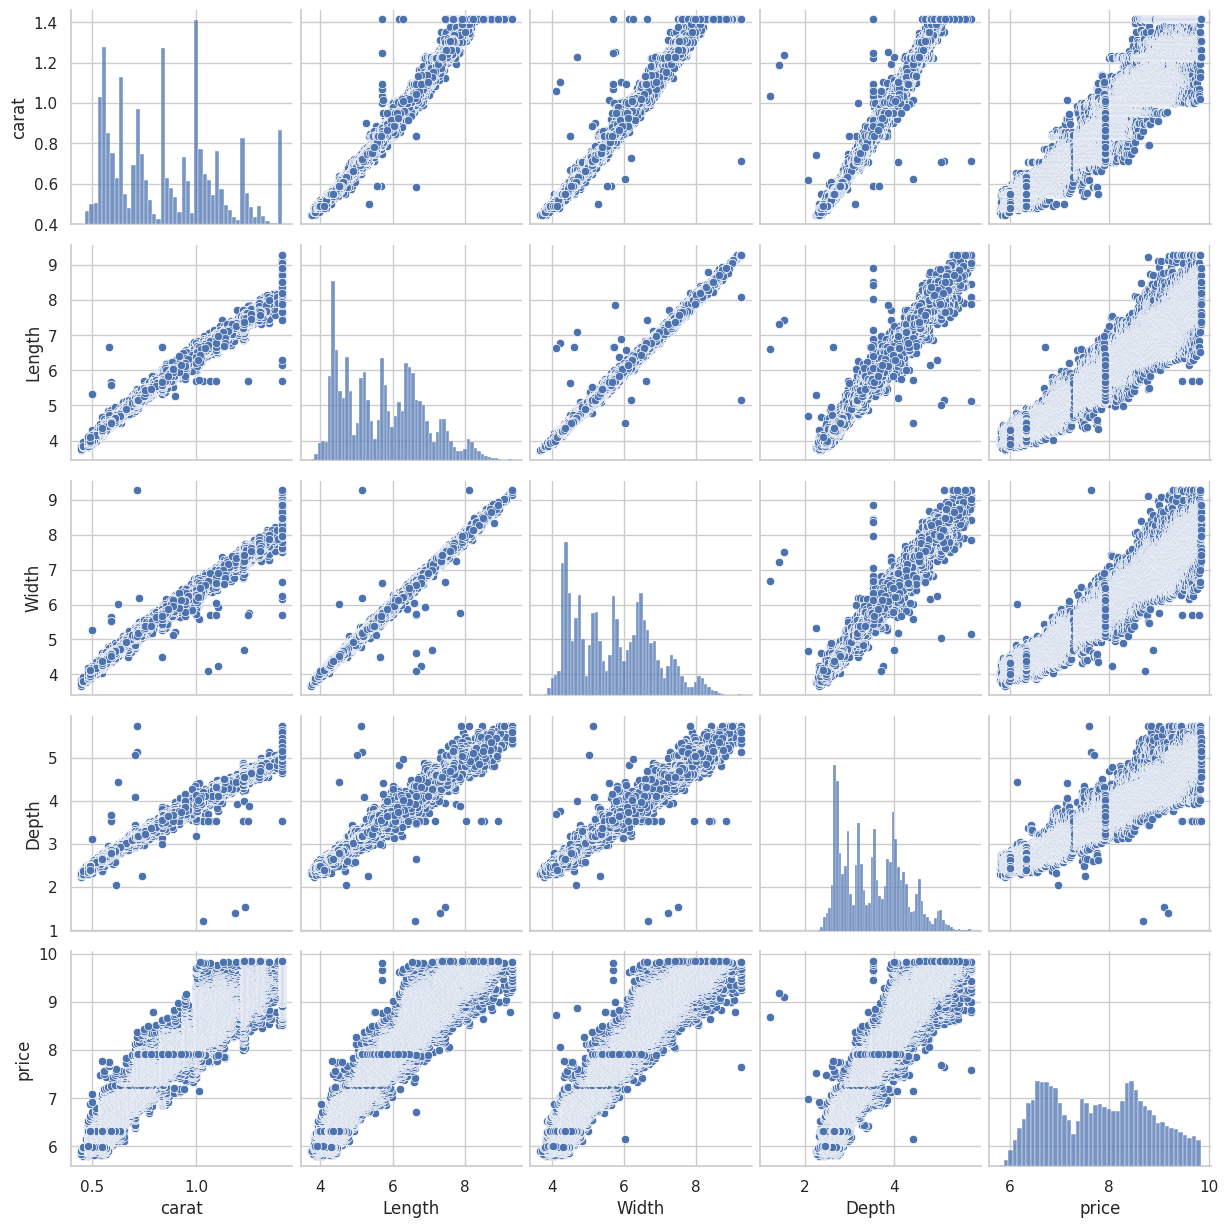

In [41]:
sns.pairplot(df[['carat', 'Length', 'Width', 'Depth', 'price']])
plt.show()


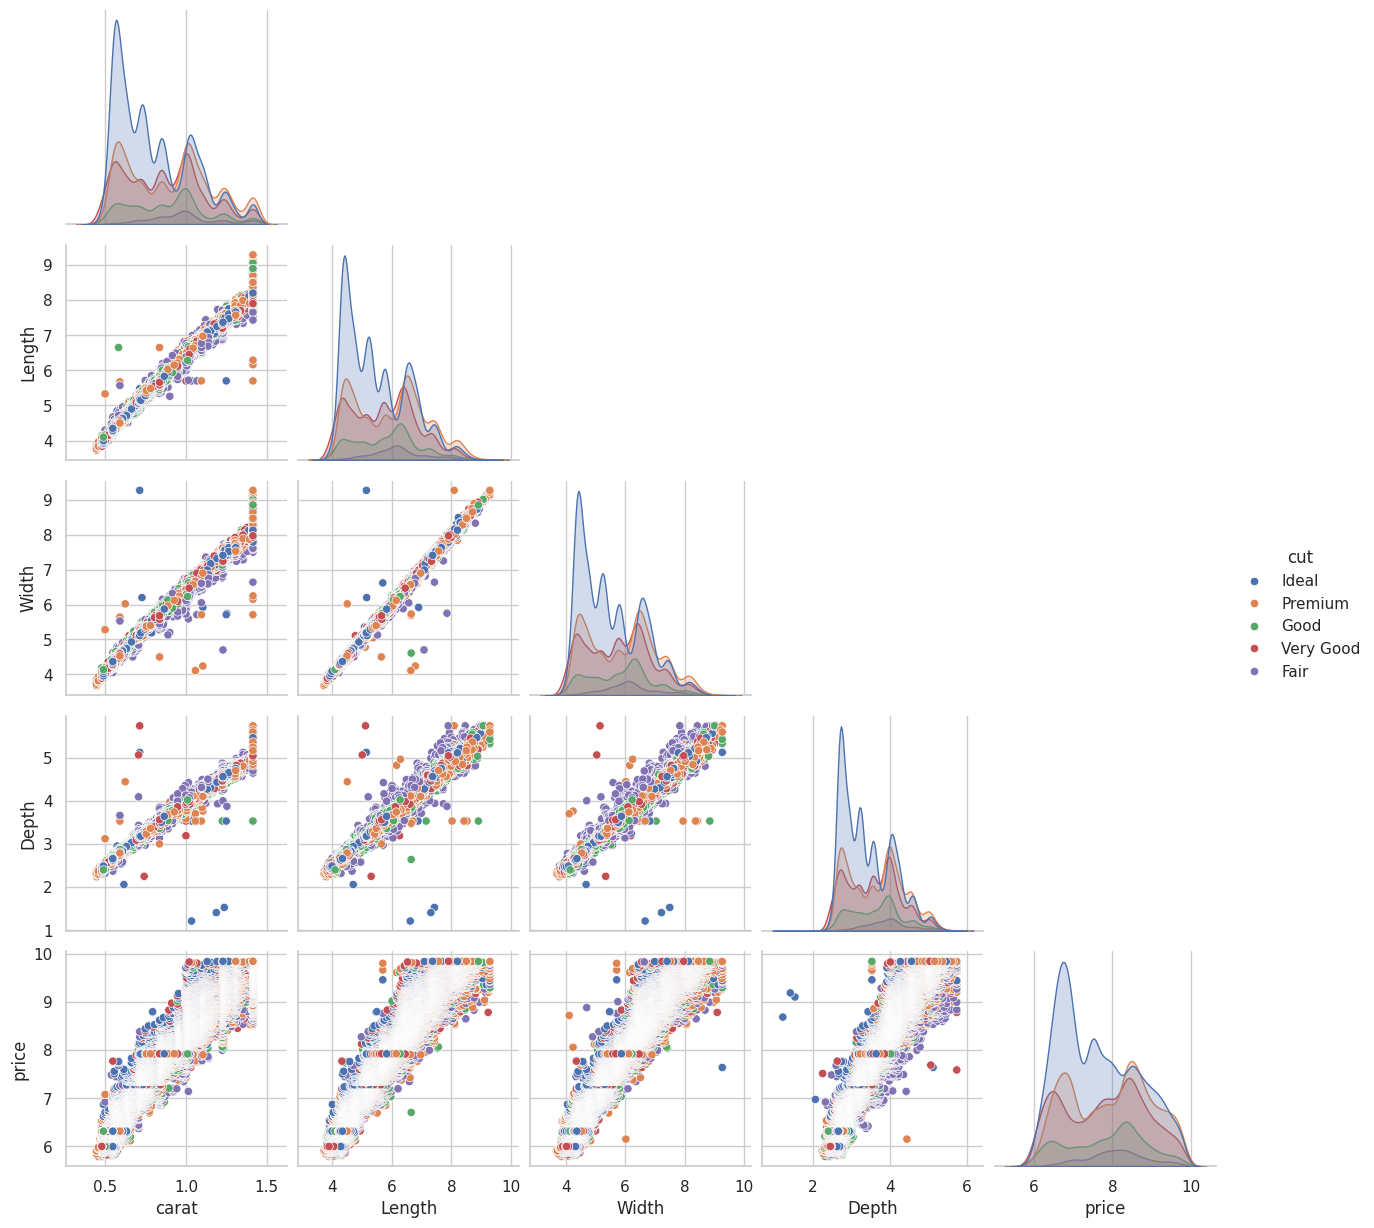

In [42]:
sns.pairplot(df, vars=['carat', 'Length', 'Width', 'Depth', 'price'],
             hue='cut', corner=True)
plt.show()


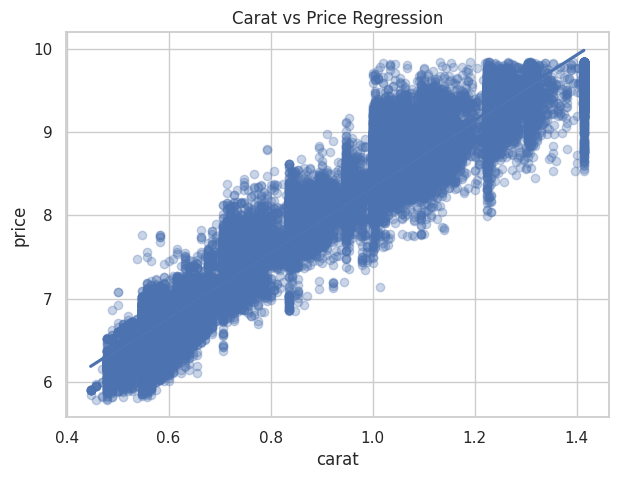

In [43]:
plt.figure(figsize=(7,5))
sns.regplot(x="carat", y="price", data=df,
            scatter_kws={"alpha":0.3})
plt.title("Carat vs Price Regression")
plt.show()


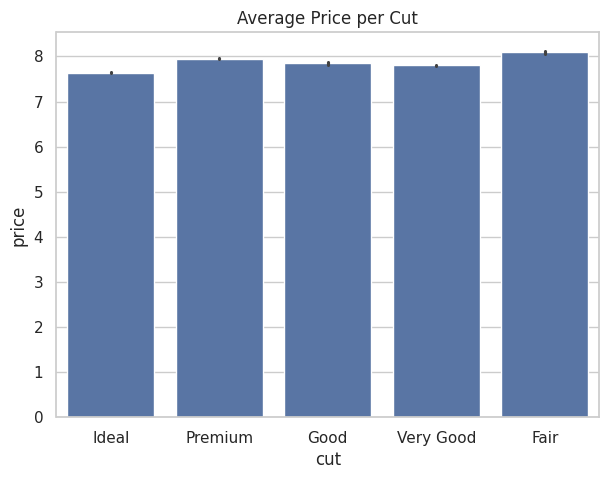

In [44]:
plt.figure(figsize=(7,5))
sns.barplot(x="cut", y="price", data=df, estimator=np.mean)
plt.title("Average Price per Cut")
plt.show()


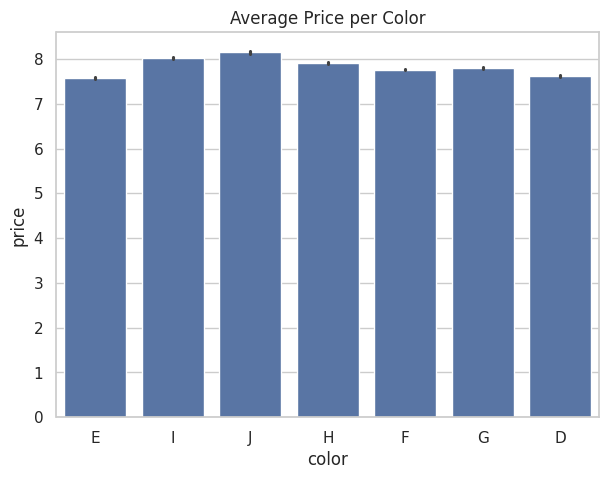

In [45]:
plt.figure(figsize=(7,5))
sns.barplot(x="color", y="price", data=df, estimator=np.mean)
plt.title("Average Price per Color")
plt.show()


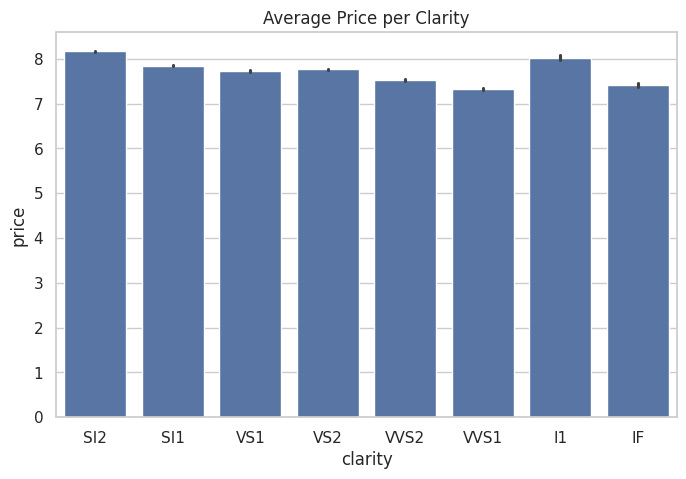

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(x="clarity", y="price", data=df, estimator=np.mean)
plt.title("Average Price per Clarity")
plt.show()


## Feature Engineering

In [47]:
import numpy as np
import pandas as pd

# ✅ 1. USD → INR Conversion
usd_to_inr = 83
df["price_inr"] = df["price"] * usd_to_inr

# ✅ 2. Volume
df["volume"] = df["Length"] * df["Width"] * df["Depth"]

# ✅ 3. Price per Carat
df["price_per_carat"] = df["price"] / (df["carat"] + 1e-6)

# ✅ 4. Dimension Ratio
df["dimension_ratio"] = (df["Length"] + df["Width"]) / (2 * df["Depth"])

# ✅ 5. Carat Category
def carat_category(carat):
    if carat < 0.5:
        return "Light"
    elif 0.5 <= carat <= 1.5:
        return "Medium"
    else:
        return "Heavy"

df["carat_category"] = df["carat"].apply(carat_category)


# Preview
print(df.head())


      carat      cut color clarity  Total_depth_Percentage  table     price  \
0  0.479583    Ideal     E     SI2                   61.50   55.0  5.789960   
1  0.458258  Premium     E     SI1                   59.80   61.0  5.789960   
2  0.479583     Good     E     VS1                   58.75   63.5  5.793014   
3  0.538516  Premium     I     VS2                   62.40   58.0  5.814131   
4  0.556776     Good     J     SI2                   63.30   58.0  5.817111   

   Length  Width  Depth   price_inr     volume  price_per_carat  \
0    3.95   3.98   2.43  480.566694  38.202030        12.072876   
1    3.89   3.84   2.31  480.566694  34.505856        12.634701   
2    4.05   4.07   2.31  480.820129  38.076885        12.079243   
3    4.20   4.23   2.63  482.572834  46.724580        10.796549   
4    4.34   4.35   2.75  482.820226  51.917250        10.447821   

   dimension_ratio carat_category  
0         1.631687          Light  
1         1.673160          Light  
2         1.75

##Feature Selection

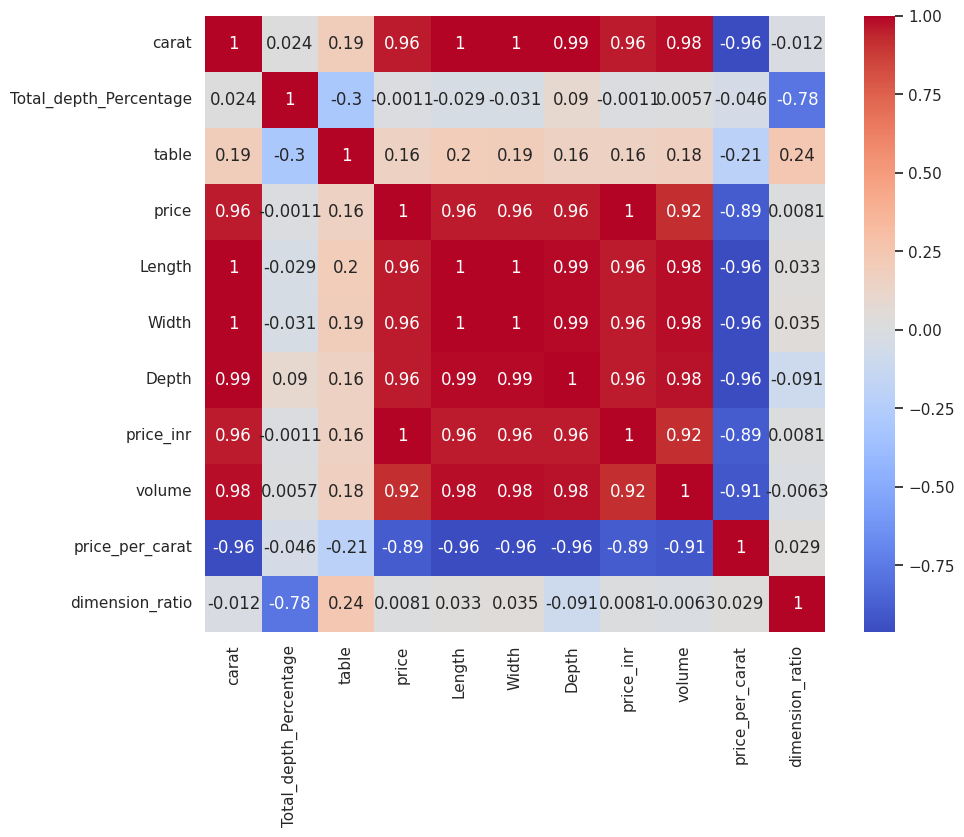

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = num_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [49]:
import numpy as np

upper = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)

to_drop = [
    column
    for column in upper.columns
    if column != 'volume' and any(upper[column].abs() > 0.85)
]

df = df.drop(columns=to_drop)


In [50]:
df

,carat,cut,color,clarity,Total_depth_Percentage,table,volume,dimension_ratio,carat_category
0,0.479583,Ideal,E,SI2,61.50,55.0,38.202030,1.631687,Light
1,0.458258,Premium,E,SI1,59.80,61.0,34.505856,1.673160,Light
2,0.479583,Good,E,VS1,58.75,63.5,38.076885,1.757576,Light
3,0.538516,Premium,I,VS2,62.40,58.0,46.724580,1.602662,Medium
4,0.556776,Good,J,SI2,63.30,58.0,51.917250,1.580000,Medium
...,...,...,...,...,...,...,...,...,...
53935,0.848528,Ideal,D,SI1,60.80,57.0,115.920000,1.644286,Medium
53936,0.848528,Good,D,SI1,63.10,55.0,118.110175,1.584488,Medium
53937,0.836660,Very Good,D,SI1,62.80,60.0,114.449728,1.592697,Medium
53938,0.927362,Premium,H,SI2,61.00,58.0,140.766120,1.640374,Medium


In [53]:
df.to_csv("/content/drive/MyDrive/diamond_preprocess.csv", index=False)